In [1]:
# from brown import get_documents
from g1 import get_documents
from util import documents2bag_of_words, bow2dump
from sparse import SparseVector


import timeit

In [2]:
#RAW VOCABULARY
# brown_documents= get_documents(verbose=True)
g1_documents= get_documents(verbose=True)

article:3000 of 3000	V:78198	WORD COUNT:1311613	docid:governo-diz-que-nao-tem-dinheiro-para-obras-no-aeroporto-de-vitoriassaoaoracitonca-18toitoira-para-liberar-corpos


In [4]:
#AFTER TOKENIZATION
# BoW, word2idx=  documents2bag_of_words(brown_documents)
BoW, word2idx=  documents2bag_of_words(g1_documents, lang='portuguese', exclude_links=True)

document:3000 of 3000	V:46230	WORD COUNT:774032	docid:governo-diz-que-nao-tem-dinheiro-para-obras-no-aeroporto-de-vitoriassaoaoracitoncaa-18toitoira-para-liberar-corpos


In [5]:
print('#words', BoW.sum())
print('#vocabulary', BoW.shape[0])
print('#documents', BoW.shape[1])
#Export 
# bow2dump(BoW[:5,:])

#words 774032
#vocabulary 46230
#documents 3000


In [6]:
# N-most frequent words
import numpy as np
idx2word= {idx:word for word,idx in word2idx.items()}
vocabulary_freq= BoW.sum(axis=1)
print(vocabulary_freq.sum())
print(vocabulary_freq.shape)

N=21 
ind = np.argpartition(vocabulary_freq, -N)[-N:]
print(ind)

#279 space
tokens= [idx2word[idx] for idx in ind if not(idx == 279)]
count= [vocabulary_freq[idx] for idx in ind if not(idx == 279)]

for t in tokens:
    print(t)
# print([idx2word[idx] for idx in ind])
for idx in ind:
    print(vocabulary_freq[idx])



774032
(46230,)
[550 238 131  93 421  65 378  11 279  95  64   7 188  96  10  94 107 394
 404 162 281]
estado
psdb
eleitoral
cidade
ser
dia
sobre
paulo
ja
prefeitura
prefeito
candidatos
segundo
sao
disse
candidato
tambem
nao
governo
nesta
1544
1603
1662
1672
1673
1706
1707
1698
1801
1881
1924
1845
2061
2504
2738
2061
2110
2270
2928
2253
2177


[1544, 1603, 1662, 1672, 1673, 1706, 1707, 1698, 1881, 1924, 1845, 2061, 2504, 2738, 2061, 2110, 2270, 2928, 2253, 2177]


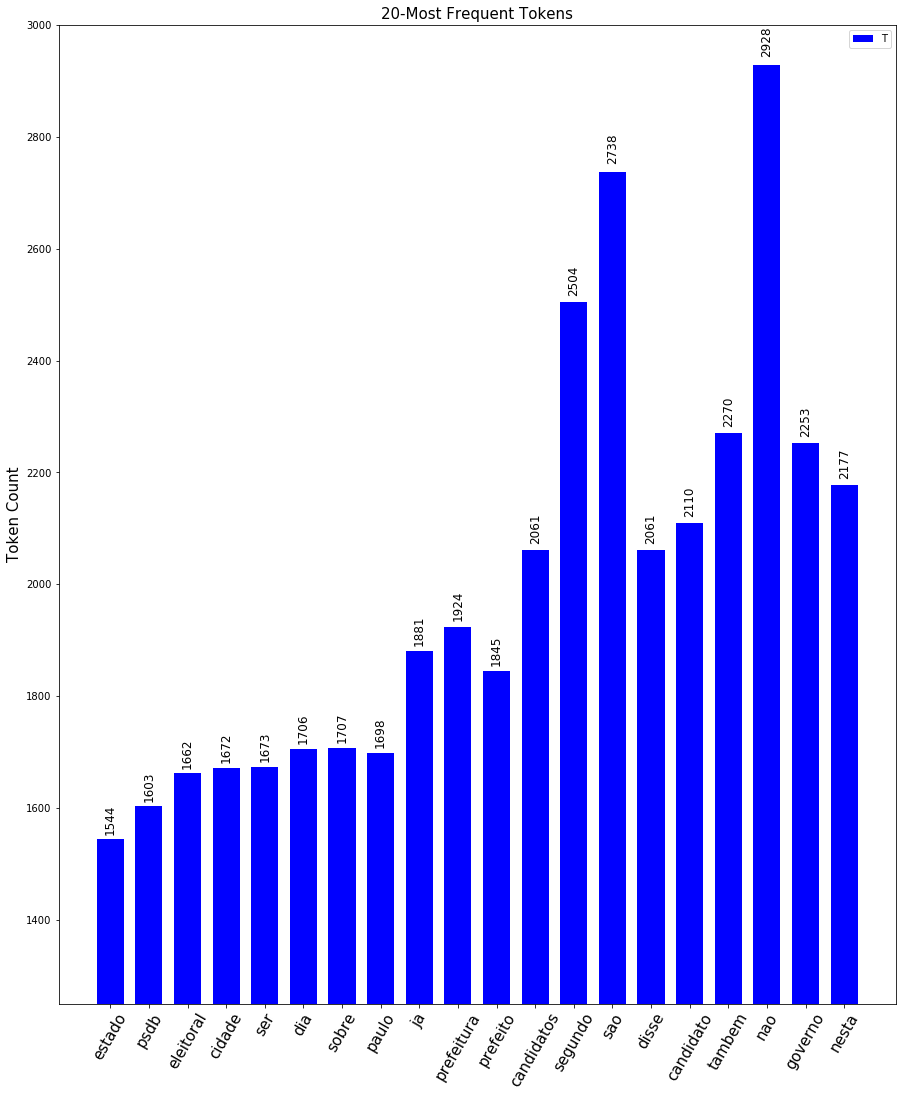

In [7]:
import matplotlib.pyplot as plt

ind = np.arange(N-1)  # the x locations for the groups
width = 0.7       # the width of the bars

print(count )
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '%d' % int(height),
                ha='center', va='bottom', rotation=90, fontsize=12)
        
fig, ax = plt.subplots(figsize=(15,18))
rects = ax.bar(ind, count, width, color='b')
ax.set_ylabel('Token Count', fontsize=15)
ax.set_title('20-Most Frequent Tokens', fontsize=15)
ax.set_xticks(ind)
ax.set_xticklabels(tokens, rotation=60, fontsize=15)



ax.legend(('Tokens'))
autolabel(rects)

axes= plt.gca()
axes.set_ylim([1250, 3000])


# plt.savefig('../../random-projection/graphics/05-20_most_frequent_tokens.svg',format='svg')
plt.savefig('../../random-projection/graphics/05-20_most_frequent_tokens.png',format='png')
plt.show()

In [8]:
#THIS WILL TAKE A WHILE
bow2dump(BoW.transpose())

In [8]:
len_files = BoW.shape[1]

In [9]:
SparseBoW = []
for i in range(BoW.shape[1]):
#     sparse_vector = sparse.SparseVector(BoW[:,i].tolist())
    sparse_vector = SparseVector(BoW[:,i].tolist())
    SparseBoW.append(sparse_vector)

In [ ]:
distances_matrix = [[0 for x in range(0, len_files)] for y in range(0, len_files)]

start_time = timeit.default_timer()

for i in range(0,len_files):
    for j in range(i+1,len_files):
        d =  SparseBoW[i].squared_euclidian_distance(SparseBoW[j])
        distances_matrix[i][j] = d 
        distances_matrix[j][i] = d 
        
elapsed = timeit.default_timer() - start_time 

print(elapsed)

In [10]:
print(BoW.sum())

538747


In [ ]:
#item 6=====================================================================================================================#

import math
import timeit

len_files = BoW.shape[1]
len_dict = BoW.shape[0]

def distance(i,j,BoW):
    internal_summation = 0
    
    for word_index in range(0,len_dict):
        coordinates_dif = BoW[word_index,i] - BoW[word_index,j]
        internal_summation = internal_summation + coordinates_dif * coordinates_dif
    
    return internal_summation
    

distances_matrix = [[0 for x in range(0, len_files)] for y in range(0, len_files)]

start_time = timeit.default_timer()

for i in range(0,len_files):
    for j in range(i+1,len_files):

        d =  distance(i,j,BoW)
        distances_matrix[i][j] = d 
        distances_matrix[j][i] = d 
        
elapsed = timeit.default_timer() - start_time 

print elapsed